In [1]:
# This makes plots appear in the notebook
%matplotlib inline 

import math
import cv2
import numpy as np
import matplotlib.pyplot as plt

import siamxt   

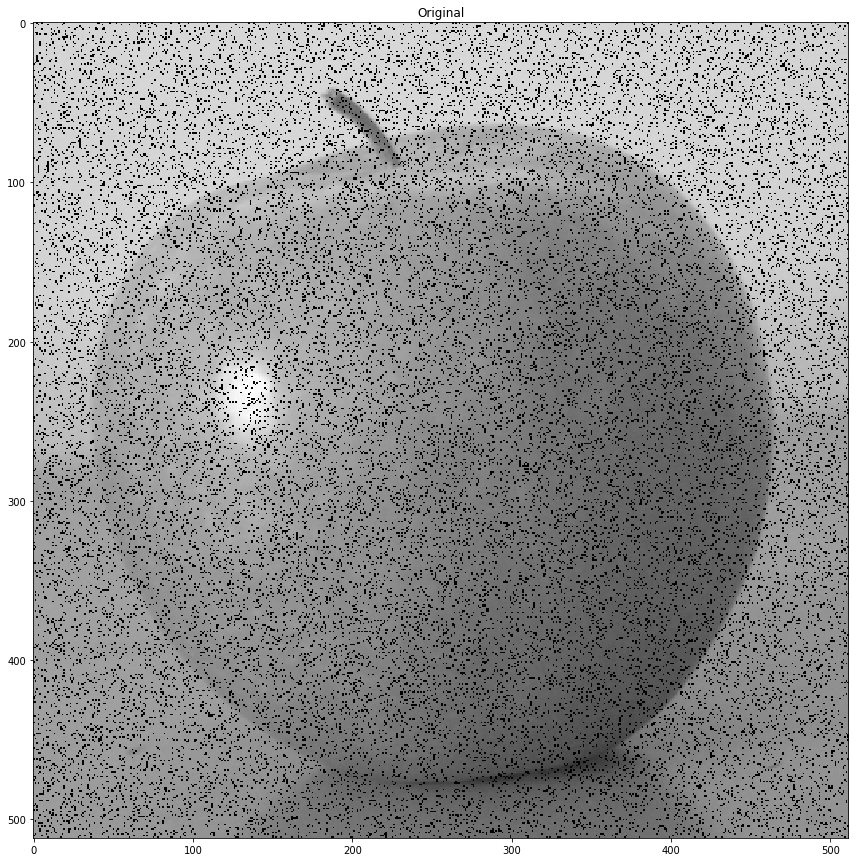

Number of max-tree nodes: 14204
Number of max-tree leaves: 11334


In [11]:
original_img = cv2.imread('../EP2/fruit.png', cv2.IMREAD_GRAYSCALE)
original_img = original_img.astype(np.uint16)

fig, imgs = plt.subplots(1,1, figsize=(15,15))
imgs.imshow(original_img, cmap='gray')
plt.title('Original')
plt.show()


#Structuring element with connectivity-8
Bc = np.ones((3,3),dtype = bool)

#Building the max-tree with the connectivity defined
mxt = siamxt.MaxTreeAlpha(original_img,Bc)

print "Number of max-tree nodes: %d" %mxt.node_array.shape[1]
print "Number of max-tree leaves: %d" %(mxt.node_array[1,:] == 0).sum()

# Area opening example

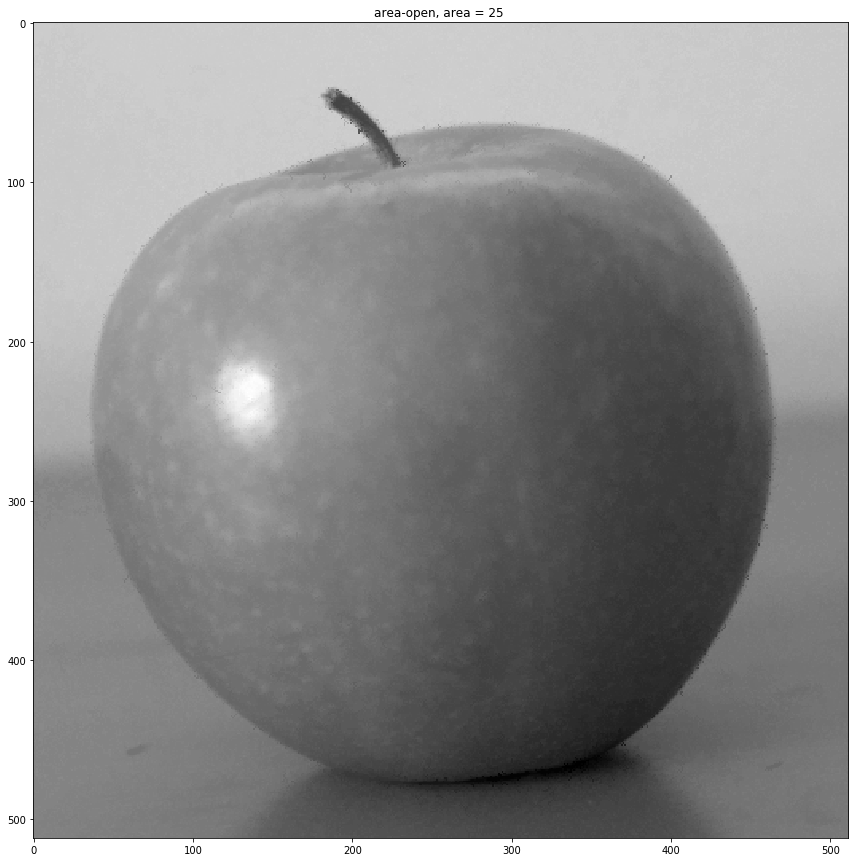

In [16]:
# Negating the image
img_max = original_img.max()
img_neg = img_max-original_img

# Area threshold
area = 25

#Building the max-tree of the negated image, i.e. min-tree
mxt_neg = siamxt.MaxTreeAlpha(img_neg,Bc)

# Making a hard copy of the max-tree
mxt_neg2 = mxt_neg.clone()

#Applying an area-open filter
mxt_neg.areaOpen(area)

#Recovering the image 
img_filtered =  mxt_neg.getImage()

# Negating the image back
img_filtered = img_max -img_filtered

#Displaying the filtered image
fig, imgs = plt.subplots(1,1, figsize=(15,15))
imgs.imshow(img_filtered, cmap='gray')
plt.title("area-open, area = %d " %area)
plt.show()
